# Lab 2: Classification and Evaluation metrics
#### COSC 410: Spring 2024, Colgate University

The goal of this notebook is to strengthen your understanding of accuracy, precision and recall. Using Logistic Regression on a toy dataset as a case study, you will practice data exploration, hypothesis generation and implementing the classic ML pipeline. 

Here are some learning objectives for this lab: 
1. Implement accuracy, precision and recall.
2. Learn the sklearn syntax to train and evaluate a classifier. 
3. Generate plots to diagnose why a model might not be performng well, and generate hypotheses about how to improve the model. 
4. Read documentation to list and understand the hyperparameters of models. 

There are 8 parts to this lab. The table below highlights what you are expected to do in each part. 

| Part | Description                                   | Write code? | Write responses? | 
|------|-----------------------------------------------| ------------|------------------|
| 1    | Familiarizing yourself with the data          | Yes         | No               |
| 2    | Fitting a logistic regression model           | No          | Yes              |
| 3    | Implementing evaluation metrics               | Yes         | No               |
| 4    | Evaluating the model                          | Yes         | Yes              |
| 5    | Generating hypotheses about feature importance| Yes         | Yes              |
| 6    | Testing hypotheses about feature importance   | Yes         | Yes              |
| 7    | Hyperparameter tuning                         | Yes         | Yes              |
| 8    | Final model evaluation                        | Yes         | No               |



## Part 1: Familiarizing yourself with the data

### Load in data

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('dat.csv')

### Describe the data

1. How many rows does it have?
2. What are the different labels?
3. What are the other columns in the data that we might be able to use to predict the labels?

In [12]:
df

,Unnamed: 0,featureA,featureB,featureC,label
0,1,8.005775,-0.833470,2.399270,Cat
1,2,2.512614,-0.012473,2.761600,Cat
2,3,1.420065,-0.424680,2.286431,Cat
3,4,6.952692,0.893134,2.982412,Cookie
4,5,1.922276,0.033275,2.187241,Cat
...,...,...,...,...,...
995,996,7.188033,0.474645,2.628059,Cookie
996,997,1.547207,-0.026606,2.331389,Cat
997,998,9.620978,0.192918,2.610359,Cookie
998,999,9.332984,-0.809800,1.823073,Cat


In [15]:
print(f"The data has {df.shape[0]} rows")
print(f"The labels are {df['label'].unique()}")
#Features A, B, & C could be used to predict the expected label


The data has 1000 rows
The labels are ['Cat' 'Cookie']


### Split the data into train, validation and test

In [16]:
n = df.shape[0]

train = df.iloc[0:int(n*0.8)]
val = df.iloc[int(n*0.8):int(n*0.9)]
test = df.iloc[int(n*0.9):n]

print(f'Train has {train.shape[0]} rows')
print(f'Val has {val.shape[0]} rows')
print(f'Test has {test.shape[0]} rows')

Train has 800 rows
Val has 100 rows
Test has 100 rows


## Part 2: Fitting a logistic regression model

Let us start by trying to predict the label based on just one of the columns: featureA. We can use the `LogisticRegression` function from sklearn. 

In [17]:
## Create separate dataframes for input (X) and output (y) from train

X_train = train[['featureA']]  # you can add more columns here.
y_train = train['label']

# Initialize the model
model = LogisticRegression() # with default parameters

# Fit the model
model.fit(X_train, y_train)  # note this modifies the model object, doesn't return

LogisticRegression()

In [18]:
## Create separate dataframes for input (X) and output (y) from validation
X_val = val[['featureA']]
y_val = val['label']

## Use model to predict labels using X_val
y_pred = model.predict(X_val)

### Why are we evaluating the model on the validation set and not the test set? 


To provide an unbiased response of how the model is performing, not impacted by having already seen the exact problems.

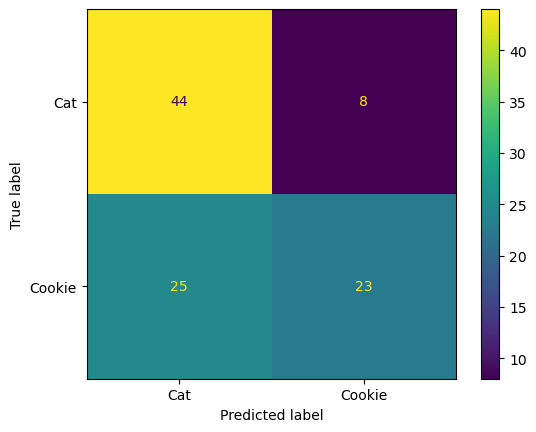

In [23]:
## Plot confusion matrix
cm = confusion_matrix(y_val, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()
plt.show()

### Is this a good classifier? 

Depends on your standards... This model has a high false positive rate where it predicts cat when it is infact a cookie. For cat, its recall is 44/(44+25) and its precision is 44/(44 + 8)

## Part 3: Implementing evaluation metrics

In [36]:
def accuracy(pred, true):
    """
    Input:
        pred: numpy array of predicted labels
        true: numpy array of true labels
    Output:
        accuracy: float as percent; rounded to two decimal points
    """
    trueCount = 0
    if (true.size != true.size):
        raise ValueError("sizes must be same size!")
    for i in range(pred.size):
        if pred[i] == true[i]:
            trueCount += 1
    
    
    # WRITE CODE HERE
    return round(trueCount/pred.size, 4) * 100


x = np.array([1,1,1,1,1,0])
y = np.array([0,0,1,1,1,1])

print(accuracy(x,y)) #50.0

x = np.array(['A','A','B','A', 'A', 'A', 'A'])
y = np.array(['A','B','A','B', 'B', 'B', 'B'])

print(accuracy(x,y)) #14.29

50.0
14.29


In [42]:
def precision(pred, true):
    """
    Input:
        pred: numpy array of predicted labels
        true: numpy array of true labels
    Output:
        macro average precision: float as percent; rounded to two decimal points
    """
   # Precision = TP/TP + FP
   # WRITE CODE HERE
    values = np.unique(pred)
    truePosFirstCount = 0
    falsePosFirstCount = 0 
    truePosSecondCount = 0 
    falsePosSecondCount = 0
    if (true.size != true.size):
        raise ValueError("sizes must be same size!")
    for i in range(pred.size):
        if (values[0] == pred[i]):
            if (true[i] == pred[i]):
                truePosFirstCount += 1
            else: 
                falsePosFirstCount += 1
        else: 
            if(true[i] == pred[i]):
                truePosSecondCount += 1
            else: 
                falsePosSecondCount += 1
    p1 = truePosFirstCount/(truePosFirstCount + falsePosFirstCount)
    p2 = truePosSecondCount/(truePosSecondCount + falsePosSecondCount)
    pCombined = (p1 + p2)/2 * 100
    return round(pCombined, 2)
    
        
x = np.array([1,1,1,1,1,0])
y = np.array([0,0,1,1,1,1])

print(precision(x,y)) #30.0

x = np.array(['A','A','B','A', 'A', 'A', 'A'])
y = np.array(['A','A','A','A', 'A', 'A', 'B'])

print(precision(x,y)) #41.67   

30.0
41.67


In [50]:
def recall(pred, true):
    """
    Input:
        pred: numpy array of predicted labels
        true: numpy array of true labels
    Output:
        macro average precision: float as percent; rounded to two decimal points
    """
    # Recall = tp/tp + fn 
    # WRITE CODE HERE
    values = np.unique(pred)
    truePosFirstCount = 0
    falseNegFirstCount = 0 
    truePosSecondCount = 0 
    falseNegSecondCount = 0
    if (true.size != true.size):
        raise ValueError("sizes must be same size!")
    for i in range(pred.size):
        if (values[0] == true[i]):
            if (true[i] != pred[i]):
                falseNegFirstCount += 1
            else: 
                truePosFirstCount += 1
        else: 
            if(true[i] == pred[i]):
                truePosSecondCount += 1
            else: 
                falseNegSecondCount += 1
    p1 = truePosFirstCount/(truePosFirstCount + falseNegFirstCount)
    p2 = truePosSecondCount/(truePosSecondCount + falseNegSecondCount)
    pCombined = (p1 + p2)/2 * 100
    return round(pCombined, 2)


x = np.array([1,1,1,1,1,0])
y = np.array([0,0,1,1,1,1])

print(recall(x,y)) #37.5

x = np.array(['A','A','B','A', 'A', 'A', 'A'])
y = np.array(['A','A','A','A', 'A', 'A', 'B'])

print(recall(x,y)) #41.67   

37.5
41.67


## Part 4: Evaluating the model 
Compute the accuracy, precision and recall for the model we fit earlier

In [57]:
y_val = np.array(y_val)

In [59]:
# WRITE CODE HERe
print(accuracy(y_pred, y_val))

# Accuracy: 67.0

print(precision(y_pred, y_val))
# Precision: 68.98

print(recall(y_pred, y_val))
# Recall: 66.27


67.0
68.98
66.27


### Interpreting the numbers
Do these numbers capture all of the insights you got from the confusion matrix earlier? If not, why?

Uhhhh... I think so. The main take aways I got were looking at it just from if it was cat or cookie, but I only looked at that from the cat perspective. I looked at precision and recall roughly for that. Giving an all-encompassing precision and recall for both ends makes it even above the insights I got earlier. If there is anything else I were to calculate, it would be the f1 value now. 

## Part 5: Generating hypotheses about what features are important 

To generate hypotheses about whether specific features are important, it can be helpful to visualize the distribution of the categories in an n-d space (where n is the number of features), and then look at the degree of overlap between the categories in this space. 

### What should the plots look like?
Brainstorm what kinds of plots might be helpful to visualize the distribution of categories in a 1-d space and 2-d space. (It might helpful to actually draw these plots out on paper)


1) 1d space plot ideas: Histogram could be good, can't really think of any other 1d plot
2) 2d space plot ideas: Scatterplot, you can see where each of your catagories group together

### Explore the importance of each individual feature

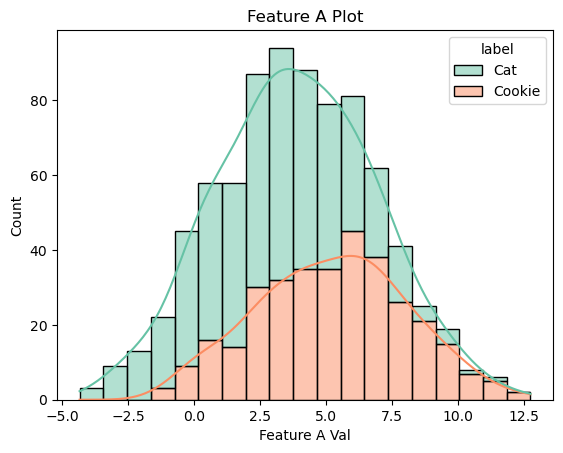

In [92]:
sns.histplot(data = train, x = 'featureA', hue = 'label', multiple = 'stack', palette = 'Set2', kde = True)
plt.title("Feature A Plot")
plt.xlabel("Feature A Val")
plt.ylabel("Count")
plt.show()

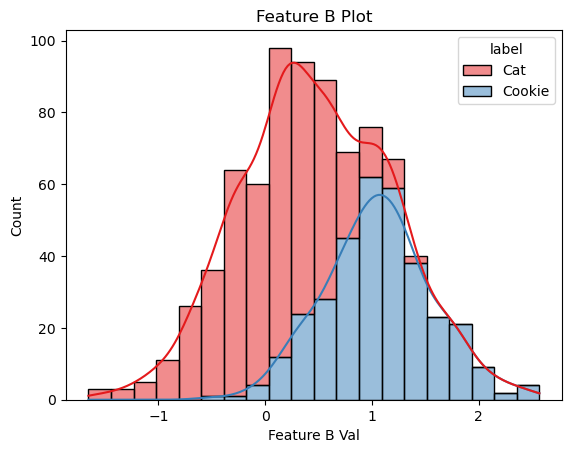

In [93]:
sns.histplot(data = train, x = 'featureB', hue = 'label', multiple = 'stack', palette = 'Set1', kde = True)
plt.title("Feature B Plot")
plt.xlabel("Feature B Val")
plt.ylabel("Count")
plt.show()

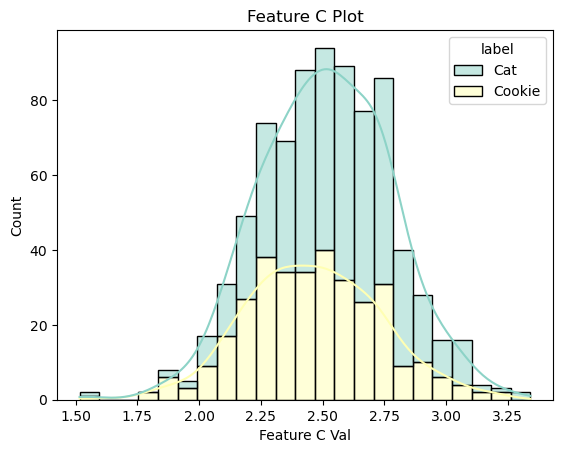

In [94]:
sns.histplot(data = train, x = 'featureC', hue = 'label', multiple = 'stack', palette = 'Set3', kde = True)
plt.title("Feature C Plot")
plt.xlabel("Feature C Val")
plt.ylabel("Count")
plt.show()

### Explore the importance of all combinations of two features

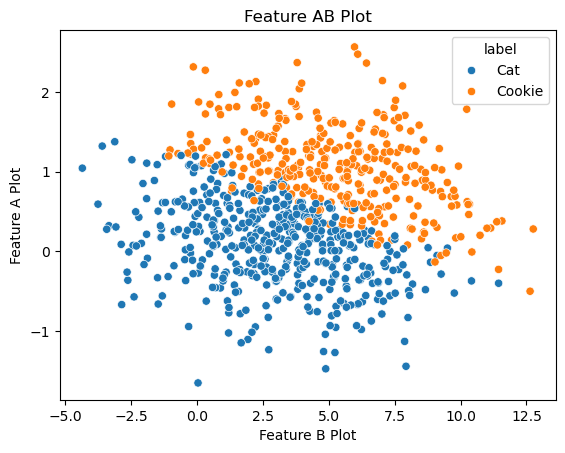

In [87]:
sns.scatterplot(data = train, x = 'featureA', y = 'featureB', hue = 'label')
plt.title("Feature AB Plot")
plt.xlabel("Feature B Plot")
plt.ylabel("Feature A Plot")
plt.show()

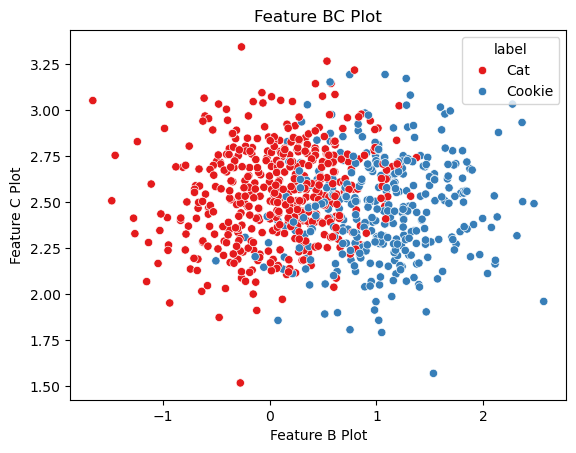

In [89]:
sns.scatterplot(data = train, x = 'featureB', y = 'featureC', hue = 'label', palette = "Set1")
plt.title("Feature BC Plot")
plt.xlabel("Feature B Plot")
plt.ylabel("Feature C Plot")
plt.show()

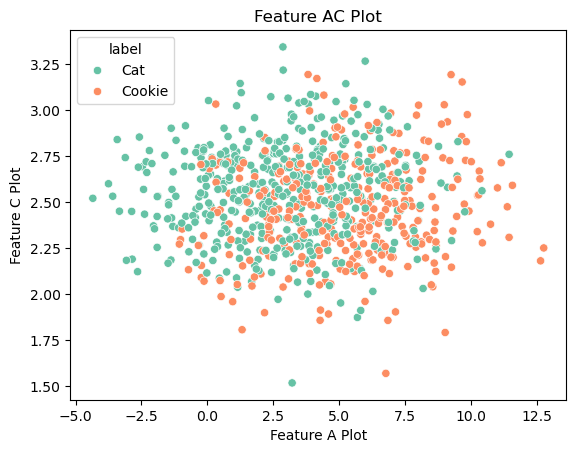

In [91]:
sns.scatterplot(data = train, x = 'featureA', y = 'featureC', hue = 'label', palette = "Set2")
plt.title("Feature AC Plot")
plt.xlabel("Feature A Plot")
plt.ylabel("Feature C Plot")
plt.show()

### Synthesize your hypotheses

1. Why did the original model we fit perform poorly?
2. If you could pick just one feature, which would you pick? Why?
3. If you could pick just two features, which would you pick? Why?

1) The first model we fit performed poorly because feature A for cookie and cat have roughly the same spectrum. There isn't much differentiation between the two
2) If I could pick just one feature, I would pick feature B. This is because cat is more likely when less than .5, and cookie is more likely > .5.
3) If I could pick two features I would pick AB. There is the least overlap between the two on the scatterplot

## Part 6: Testing your hypotheses

Fit models for all individual features, and combinations of features

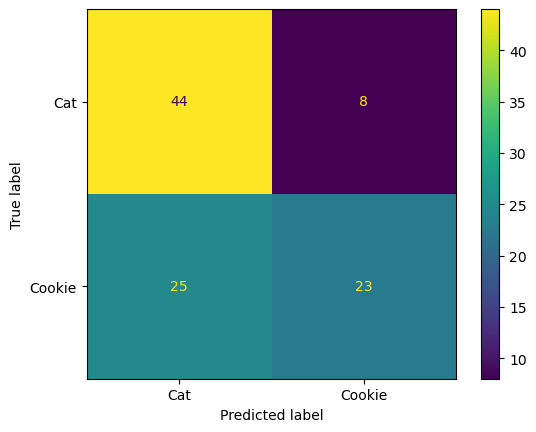

In [70]:
X_trainA = train[['featureA']]  # you can add more columns here.
y_trainA = train['label']

# Initialize the model
modelA = LogisticRegression() # with default parameters

# Fit the model
modelA.fit(X_trainA, y_trainA)  # note this modifies the model object, doesn't return
X_valA = val[['featureA']]
y_valA = val['label']

## Use model to predict labels using X_val
y_predA = modelA.predict(X_valA)
## Plot confusion matrix
cmA = confusion_matrix(y_valA, y_predA)

dispA = ConfusionMatrixDisplay(confusion_matrix=cmA,
                              display_labels=modelA.classes_)
dispA.plot()
plt.show()

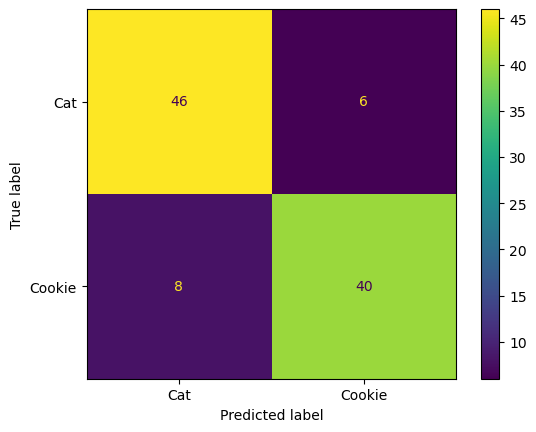

In [71]:
X_trainB = train[['featureB']]  # you can add more columns here.
y_trainB = train['label']

# Initialize the model
modelB = LogisticRegression() # with default parameters

# Fit the model
modelB.fit(X_trainB, y_trainB)  # note this modifies the model object, doesn't return
X_valB = val[['featureB']]
y_valB = val['label']

## Use model to predict labels using X_val
y_predB = modelB.predict(X_valB)
## Plot confusion matrix
cmB = confusion_matrix(y_valB, y_predB)

dispB = ConfusionMatrixDisplay(confusion_matrix=cmB,
                              display_labels=modelB.classes_)
dispB.plot()
plt.show()

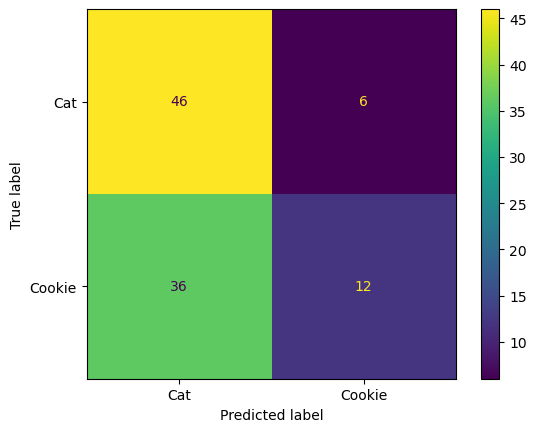

In [72]:
X_trainC = train[['featureC']]  # you can add more columns here.
y_trainC = train['label']

# Initialize the model
modelC = LogisticRegression() # with default parameters

# Fit the model
modelC.fit(X_trainC, y_trainC)  # note this modifies the model object, doesn't return
X_valC = val[['featureC']]
y_valC = val['label']

## Use model to predict labels using X_val
y_predC = modelC.predict(X_valC)
## Plot confusion matrix
cmC = confusion_matrix(y_valC, y_predC)

dispC = ConfusionMatrixDisplay(confusion_matrix=cmC,
                              display_labels=modelC.classes_)
dispC.plot()
plt.show()

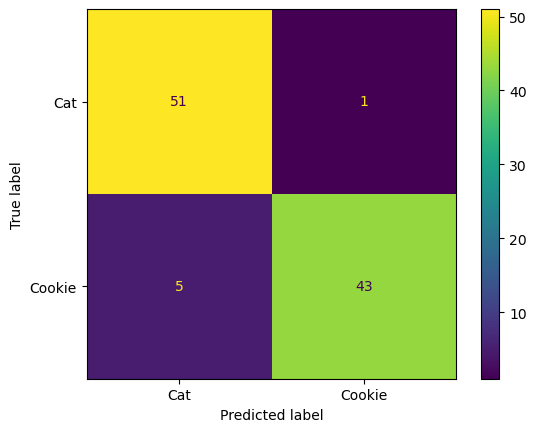

In [73]:
X_trainAB = train[['featureA', 'featureB']]  # you can add more columns here.
y_trainAB = train['label']

# Initialize the model
modelAB = LogisticRegression() # with default parameters

# Fit the model
modelAB.fit(X_trainAB, y_trainAB)  # note this modifies the model object, doesn't return
X_valAB = val[['featureA', 'featureB']]
y_valAB = val['label']

## Use model to predict labels using X_val
y_predAB = modelAB.predict(X_valAB)
## Plot confusion matrix
cmAB = confusion_matrix(y_valAB, y_predAB)

dispAB = ConfusionMatrixDisplay(confusion_matrix=cmAB,
                              display_labels=modelAB.classes_)
dispAB.plot()
plt.show()

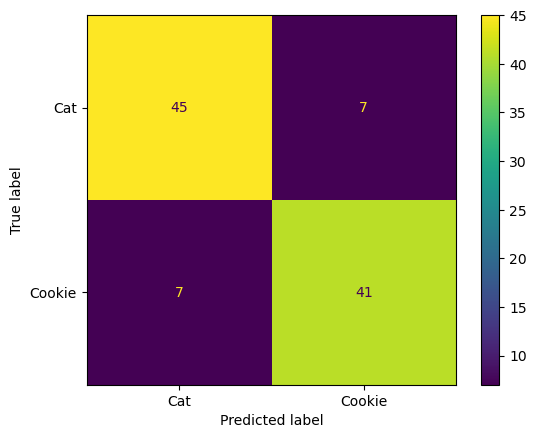

In [74]:
X_trainBC = train[['featureB', 'featureC']]  # you can add more columns here.
y_trainBC = train['label']

# Initialize the model
modelBC = LogisticRegression() # with default parameters

# Fit the model
modelBC.fit(X_trainBC, y_trainBC)  # note this modifies the model object, doesn't return
X_valBC = val[['featureB', 'featureC']]
y_valBC = val['label']

## Use model to predict labels using X_val
y_predBC = modelBC.predict(X_valBC)
## Plot confusion matrix
cmBC = confusion_matrix(y_valBC, y_predBC)

dispBC = ConfusionMatrixDisplay(confusion_matrix=cmBC,
                              display_labels=modelBC.classes_)
dispBC.plot()
plt.show()

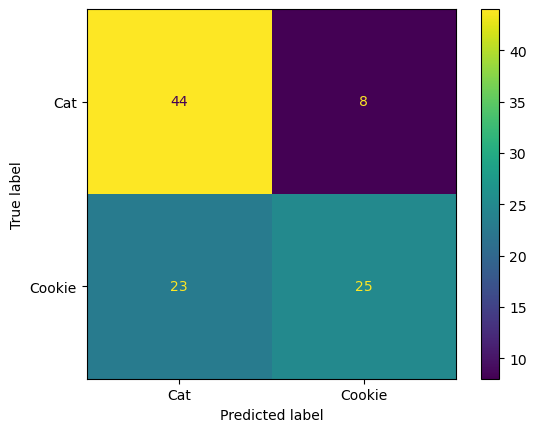

In [75]:
X_trainAC = train[['featureA', 'featureC']]  # you can add more columns here.
y_trainAC = train['label']

# Initialize the model
modelAC = LogisticRegression() # with default parameters

# Fit the model
modelAC.fit(X_trainAC, y_trainAC)  # note this modifies the model object, doesn't return
X_valAC = val[['featureA', 'featureC']]
y_valAC = val['label']

## Use model to predict labels using X_val
y_predAC = modelAC.predict(X_valAC)
## Plot confusion matrix
cmAC = confusion_matrix(y_valAC, y_predAC)

dispAC = ConfusionMatrixDisplay(confusion_matrix=cmAC,
                              display_labels=modelAC.classes_)
dispAC.plot()
plt.show()

### Do the results match your hypotheses?



Yes, of the different results for 1 feature, B preforms best. For the results of 2 features, AB performs best. 

## Part 7: Hyperparameter tuning

The `LogisticRegression` function has several hyperparameters. Read about these hyperparameters in the documentation for this function. 


### Generating hypotheses about relevance of hyperparameters

Which of the hyperparameters (if any) do you think is likely to influence the results and why?



My guesses would be:
1) l1_ratio, as this would impact which feature is weighted on more.
2) C, as regularization could impact results
3) tol, as stopping could make it stop too early/too late
4) solver, as it changes the solving algorithm
5) max_iter, as it changes the number of iterations
6) penalty, as it changes regularization technique 

### Testing hypotheses about relevance of hyperparameters

For the hyperparameters you selected in the previous answer, experiment with the different settings, and see if they improve your results or make them worse. Feel free to add as many code chunks as you need. s

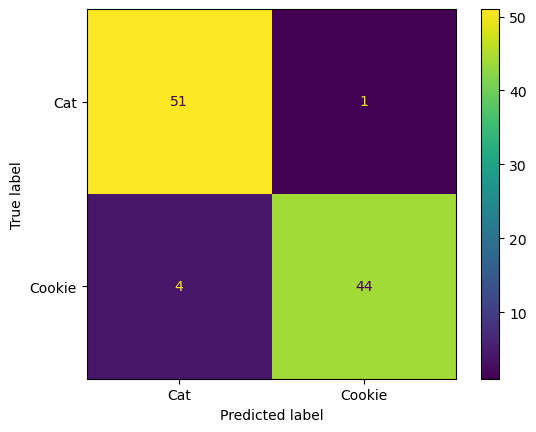

In [115]:
X_trainAB = train[['featureA', 'featureB']]  # you can add more columns here.
y_trainAB = train['label']

# Initialize the model
modelAB = LogisticRegression(penalty = 'elasticnet', l1_ratio = .2, solver = 'saga', max_iter = 500) # with default parameters

# Fit the model
modelAB.fit(X_trainAB, y_trainAB)  # note this modifies the model object, doesn't return
X_valAB = val[['featureA', 'featureB']]
y_valAB = val['label']

## Use model to predict labels using X_val
y_predAB = modelAB.predict(X_valAB)
## Plot confusion matrix
cmAB = confusion_matrix(y_valAB, y_predAB)

dispAB = ConfusionMatrixDisplay(confusion_matrix=cmAB,
                              display_labels=modelAB.classes_)
dispAB.plot()
plt.show()

Worked Slightly Better, predicted cat when cookie now 4 instead of 5. Experimented with different l1_ratio values and max iteration values. Needed to include penalty and solver for it to work as well. 

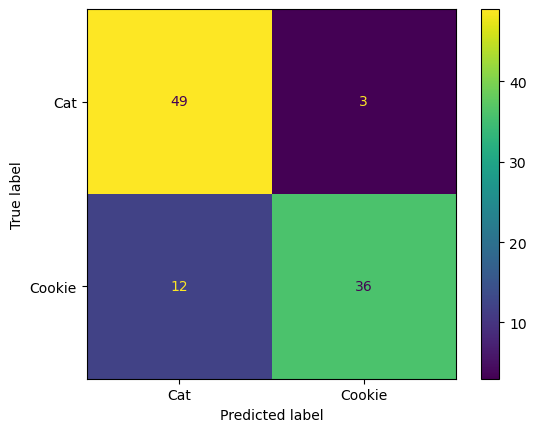

In [110]:
X_trainAB = train[['featureA', 'featureB']]  # you can add more columns here.
y_trainAB = train['label']

# Initialize the model
modelAB = LogisticRegression(penalty = 'elasticnet', l1_ratio = .1, solver = 'saga', max_iter = 500, C = .01) # with default parameters

# Fit the model
modelAB.fit(X_trainAB, y_trainAB)  # note this modifies the model object, doesn't return
X_valAB = val[['featureA', 'featureB']]
y_valAB = val['label']

## Use model to predict labels using X_val
y_predAB = modelAB.predict(X_valAB)
## Plot confusion matrix
cmAB = confusion_matrix(y_valAB, y_predAB)

dispAB = ConfusionMatrixDisplay(confusion_matrix=cmAB,
                              display_labels=modelAB.classes_)
dispAB.plot()
plt.show()

Low C Value increases error rate

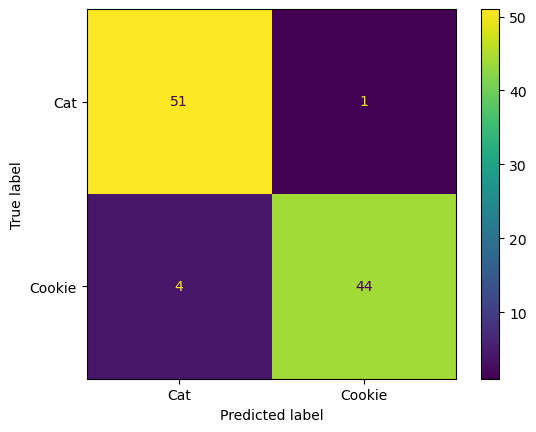

In [114]:
X_trainAB = train[['featureA', 'featureB']]  # you can add more columns here.
y_trainAB = train['label']

# Initialize the model
modelAB = LogisticRegression(penalty = 'elasticnet', l1_ratio = .2, solver = 'saga', max_iter = 1000, C = 10) # with default parameters

# Fit the model
modelAB.fit(X_trainAB, y_trainAB)  # note this modifies the model object, doesn't return
X_valAB = val[['featureA', 'featureB']]
y_valAB = val['label']

## Use model to predict labels using X_val
y_predAB = modelAB.predict(X_valAB)
## Plot confusion matrix
cmAB = confusion_matrix(y_valAB, y_predAB)

dispAB = ConfusionMatrixDisplay(confusion_matrix=cmAB,
                              display_labels=modelAB.classes_)
dispAB.plot()
plt.show()

No seen impact from C = 1 to C = 10, takes more iterations with C = 10 though, so C = 1 is probably better

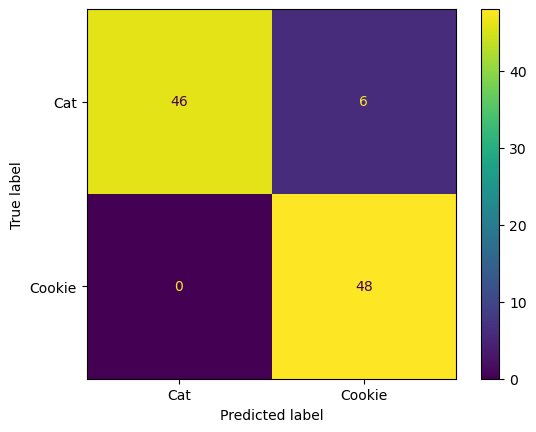

In [118]:
X_trainAB = train[['featureA', 'featureB']]  # you can add more columns here.
y_trainAB = train['label']

# Initialize the model
modelAB = LogisticRegression(penalty = 'elasticnet', l1_ratio = .2, solver = 'saga', max_iter = 500, tol = 1) # with default parameters

# Fit the model
modelAB.fit(X_trainAB, y_trainAB)  # note this modifies the model object, doesn't return
X_valAB = val[['featureA', 'featureB']]
y_valAB = val['label']

## Use model to predict labels using X_val
y_predAB = modelAB.predict(X_valAB)
## Plot confusion matrix
cmAB = confusion_matrix(y_valAB, y_predAB)

dispAB = ConfusionMatrixDisplay(confusion_matrix=cmAB,
                              display_labels=modelAB.classes_)
dispAB.plot()
plt.show()

Tolerance of 1 makes cat incorrectly predicted = 0, but cookie increases

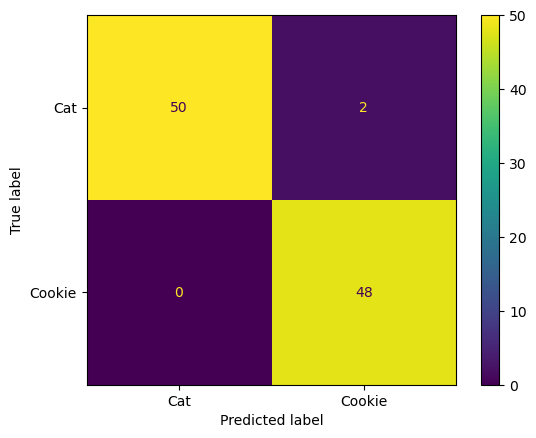

In [133]:
X_trainAB = train[['featureA', 'featureB']]  # you can add more columns here.
y_trainAB = train['label']

# Initialize the model
modelAB = LogisticRegression(penalty = 'elasticnet', l1_ratio = .2, solver = 'saga', max_iter = 1000, tol = .5) # with default parameters

# Fit the model
modelAB.fit(X_trainAB, y_trainAB)  # note this modifies the model object, doesn't return
X_valAB = val[['featureA', 'featureB']]
y_valAB = val['label']

## Use model to predict labels using X_val
y_predAB = modelAB.predict(X_valAB)
## Plot confusion matrix
cmAB = confusion_matrix(y_valAB, y_predAB)

dispAB = ConfusionMatrixDisplay(confusion_matrix=cmAB,
                              display_labels=modelAB.classes_)
dispAB.plot()
plt.show()

Holy Moly. Thats pretty darn good. I experimented with the tolerence at a bunch of different values. Thats as good as I could get it. Best results with tolerence between .2 and .8. I don't think I can get it better than that

## Part 8: Fit the final model and evaluate it

Based on your experimentation, select the best model and report the final results. (Think about which dataset you want to evaluate your final model on)

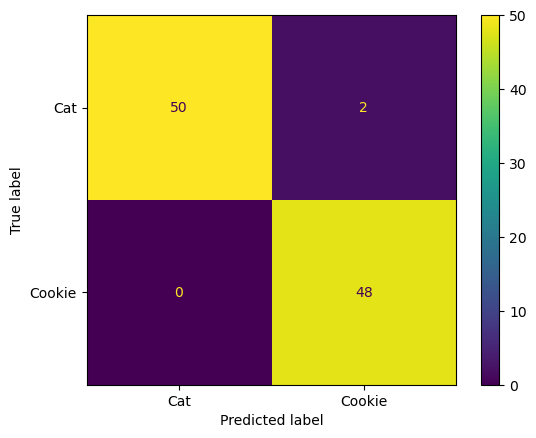

In [144]:
X_trainAB = train[['featureA', 'featureB']]  # you can add more columns here.
y_trainAB = train['label']

# Initialize the model
modelAB = LogisticRegression(penalty = 'elasticnet', l1_ratio = .2, solver = 'saga', max_iter = 1000, tol = .6) # with default parameters

# Fit the model
modelAB.fit(X_trainAB, y_trainAB)  # note this modifies the model object, doesn't return
X_valAB = val[['featureA', 'featureB']]
y_valAB = val['label']

## Use model to predict labels using X_val
y_predAB = modelAB.predict(X_valAB)
## Plot confusion matrix
cmAB = confusion_matrix(y_valAB, y_predAB)

dispAB = ConfusionMatrixDisplay(confusion_matrix=cmAB,
                              display_labels=modelAB.classes_)
dispAB.plot()
plt.show()

I am curious if anyone was able to do better than this. If they did I am very interested in what features they used. Please let me know :)